# Cosmology

In [18]:
from test_cosmo import cosmo
import numpy as np
import matplotlib.pyplot as plt


z = np.linspace(0,1,1000)
args = (0.3, 0.7)
funct = np.vectorize(cosmo.flcdm_inv_efunc_norel)

In [3]:
%%time
x = funct(z, *args)

CPU times: user 392 µs, sys: 260 µs, total: 652 µs
Wall time: 686 µs


In [30]:
ms = np.logspace( 
     np.log10(lambdaBBHmass['ml']-lambdaBBHmass['ml']/20), 
     np.log10(lambdaBBHmass['mh']+lambdaBBHmass['mh']/20), 
     5000 )
     
M1S, M2S = np.meshgrid(ms, ms, indexing='ij')
print(len(M1S))

5000


In [27]:
%%time
mf.logpdf([M1S,M2S], lambdaBBHmass.values())

CPU times: user 1.01 s, sys: 332 ms, total: 1.35 s
Wall time: 1.45 s


array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf]])

In [28]:
mf.logpdf([np.array([30.]),
           np.array([20.])],
           lambdaBBHmass.values())

array([-7.57195497])

# Broken PL

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../../../DarkSirensStatV1")
sys.path.append("../../DarkSirensStatV1")
import DarkSirensStatV1 as DS
import MGCosmoPop
from MGCosmoPop.population.astro import astroMassDistribution
import numpy as np
mf = astroMassDistribution.BrokenPowerLawMass()
lambdaBBHmass = {'alpha1': 1.6, 'alpha2': 5.6, 'beta': 1.4, 'deltam': 4.8, 'ml': 4, 'mh': 87, 'b': 0.43}

Broken power law mass function base values: {'alpha1': 1.6, 'alpha2': 5.6, 'beta': 1.4, 'deltam': 4.8, 'ml': 4, 'mh': 87, 'b': 0.43}


In [2]:
from test_mass import mass
import numpy as np
import importlib
importlib.reload(mass)
m2 = np.linspace(1,100,10**7)
m1 = np.linspace(2,101,10**7)

# m2[6] = np.nan

ml, mh = 0,9999
alpha1, alpha2 = 1,1
dm,b=3,10

ml, mh = lambdaBBHmass["ml"],lambdaBBHmass["mh"]
alpha1, alpha2 = lambdaBBHmass["alpha1"],lambdaBBHmass["alpha2"]
dm,b=lambdaBBHmass["deltam"],lambdaBBHmass["b"]
beta = lambdaBBHmass["beta"]

## _logpdfm1

In [5]:
%%timeit
mgcp = mf._logpdfm1(m1, alpha1, alpha2, dm, ml,mh,b)

318 ms ± 30 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
my = mass._logpdfm1(m1, ml,mh,alpha1,alpha2,dm,b)

145 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
mgcp = mf._logpdfm1(m1, alpha1, alpha2, dm, ml,mh,b)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())
print("mbreak", mf._get_Mbreak(ml,mh,b))

my = mass._logpdfm1(m1, ml,mh,alpha1,alpha2,dm,b)
print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())
print("mbreak", mass._mbreak(ml,mh,b))

print("\nEqual? ", np.isclose(mgcp,my).all())

Finite [-5.92593751e+05 -2.66667858e+05 -1.72044212e+05 ... -1.02846867e+01
 -1.02846873e+01 -1.02846879e+01]
N Finite 8383837
mbreak 39.69

Finite [-5.92593751e+05 -2.66667858e+05 -1.72044212e+05 ... -1.02846867e+01
 -1.02846873e+01 -1.02846879e+01]
N Finite 8383837
mbreak 39.69

Equal?  True


/tmp/ipykernel_9141/1845948628.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(m1, my-mgcp, c='k')


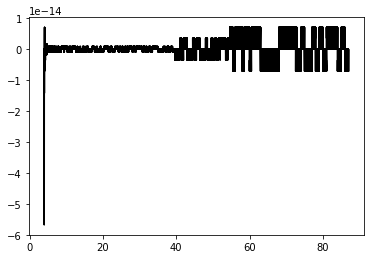

In [12]:
plt.plot(m1, my-mgcp, c='k')

## _logpdfm2

In [10]:
%%timeit
mgcp = mf._logpdfm2(m1, beta, dm, ml)

173 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit
my = mass._logpdfm2(m1, ml, beta, dm)

95.2 ms ± 4.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
mgcp = mf._logpdfm2(m2, beta, dm, ml)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())
print("mbreak", mf._get_Mbreak(ml,mh,b))

my = mass._logpdfm2(m2, ml, beta, dm)
print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())
print("mbreak", mass._mbreak(ml,mh,b))

print("\nEqual? ", np.isclose(mgcp,my).all())

Finite [-6.66663659e+05 -2.80698785e+05 -1.77774819e+05 ...  6.44723798e+00
  6.44723812e+00  6.44723826e+00]
N Finite 9696969
mbreak 39.69

Finite [-6.66663659e+05 -2.80698785e+05 -1.77774819e+05 ...  6.44723798e+00
  6.44723812e+00  6.44723826e+00]
N Finite 9696969
mbreak 39.69

Equal?  True


/tmp/ipykernel_11424/1397392996.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(m2, (my-mgcp)/mgcp)


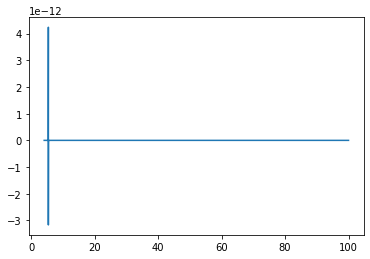

In [8]:
plt.plot(m2, (my-mgcp)/mgcp)
# plt.xlim(5.2,5.5)

## _logC

In [3]:
%%timeit
mgcp = mf._logC(m1, beta, dm, ml)

202 ms ± 8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
my = mass._logC(m1, ml, beta, dm)

131 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
mgcp = mf._logC(m2, beta, dm, ml)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass._logC(m2, ml, beta, dm)
print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

print("\nEqual? ", np.isclose(mgcp,my).all())

Finite [182.27599058 182.27599058 182.27599058 ... -10.17554309 -10.17554333
 -10.17554356]
N Finite 10000000

Finite [182.27599058 182.27599058 182.27599058 ... -10.17554309 -10.17554333
 -10.17554356]
N Finite 10000000

Equal?  True


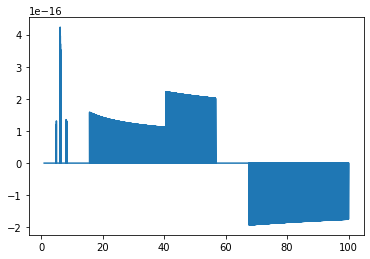

In [8]:
plt.plot(m2, (my-mgcp)/mgcp)

## _logN

In [10]:
%%timeit
mgcp = mf._logNorm(alpha1, alpha2, dm, ml, mh, b)

195 µs ± 6.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
%%timeit
my = mass._logN(ml, mh, alpha1, alpha2, dm, b)

127 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
mgcp = mf._logNorm(alpha1, alpha2, dm, ml, mh, b)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass._logN(ml, mh, alpha1, alpha2, dm, b)
print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

print("\nEqual? ", np.isclose(mgcp,my).all())
print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [-0.93786414]
N Finite 1

Finite [-0.93785802]
N Finite 1

Equal?  True
DIFF PERC:  -6.5274646690328406e-06


## logpdf

In [3]:
%%timeit
mgcp = mf.logpdf([m1,m2], [alpha1, alpha2, beta, dm, ml, mh, b])

718 ms ± 31.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
my = mass.logpdf_BPL(m1,m2,ml,mh,alpha1,alpha2,beta,dm,b)

429 ms ± 9.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
mgcp        = mf.logpdf([m1,m2], [alpha1, alpha2, beta, dm, ml, mh, b])
finite_mgcp = np.isfinite(mgcp)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my          = mass.logpdf_BPL(m1,m2,ml,mh,alpha1,alpha2,beta,dm,b)
finite_my   = np.isfinite(my)

print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

diff_perc_finite = (my[finite_mgcp]-mgcp[finite_mgcp])/mgcp[finite_mgcp]
print("\nEqual? ", np.isclose(mgcp,my, rtol=1e-3).all())
print("Equal finite? ", np.isclose(finite_mgcp,finite_my).all())
# print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [-6.66665615e+05 -2.80700741e+05 -1.77776775e+05 ... -1.29514943e+01
 -1.29514951e+01 -1.29514958e+01]
N Finite 8282827

Finite [-6.66665615e+05 -2.80700741e+05 -1.77776775e+05 ... -1.29515132e+01
 -1.29515139e+01 -1.29515147e+01]
N Finite 8282827

Equal?  True
Equal finite?  True


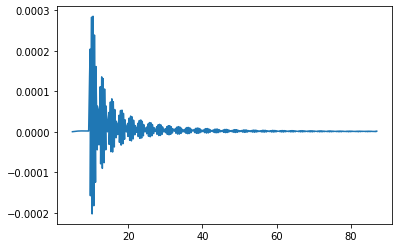

In [14]:
# plt.plot(m1[finite_mgcp],my[finite_mgcp])
# plt.plot(m1[finite_mgcp],mgcp[finite_mgcp])
plt.plot(m1[finite_mgcp],diff_perc_finite)

# plt.ylim(-20,0)

# Truncated PL

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../../../DarkSirensStatV1")
sys.path.append("../../DarkSirensStatV1")
import DarkSirensStatV1 as DS
import MGCosmoPop
from MGCosmoPop.population.astro import astroMassDistribution
import numpy as np
mf = astroMassDistribution.TruncPowerLawMass()
lambdaBBHmass = {'alpha': 0.75, 'beta': 0.0, 'ml': 4.0, 'mh': 78.5}

from test_mass import mass
import numpy as np
import importlib
importlib.reload(mass)
m2 = np.linspace(1,100,10**7)
m1 = np.linspace(2,101,10**7)

ml, mh = lambdaBBHmass["ml"],lambdaBBHmass["mh"]
alpha = lambdaBBHmass["alpha"]
beta = lambdaBBHmass["beta"]

In [2]:
%%timeit
mgcp = mf._logC(m1,beta,ml)

/home/debian/software/MGCosmoPopPrivate/MGCosmoPop/utils.py:15: RuntimeWarning: invalid value encountered in log1p
  return x + np.log1p(-np.exp(y-x))


258 ms ± 90.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%%timeit
my = mass._logC_TPL(m1,ml,beta)

330 ms ± 26.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
mgcp = mf._logNorm(alpha,ml,mh)

4.9 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
%%timeit
mgcp = mass._logN_TPL(ml,mh,alpha)

168 ns ± 9.69 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## logpdf

In [6]:
%%timeit
mgcp = mf.logpdf([m1,m2], [alpha, beta, ml, mh])

508 ms ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
my = mass.logpdf_TPL(m1,m2, ml, mh, alpha, beta)

460 ms ± 9.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
mgcp = mf.logpdf([m1,m2], [alpha, beta, ml, mh])
finite_mgcp = np.isfinite(mgcp)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass.logpdf_TPL(m1,m2, ml, mh, alpha, beta)
finite_my   = np.isfinite(my)

print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

diff_perc_finite = (my[finite_mgcp]-mgcp[finite_mgcp])/mgcp[finite_mgcp]
print("\nEqual? ", np.isclose(mgcp,my, rtol=1e-3).all())
print("Equal finite? ", np.isclose(finite_mgcp,finite_my).all())
# print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [-3.03958206 -3.03959344 -3.03960483 ... -9.41561777 -9.41561799
 -9.41561822]
N Finite 7424241

Finite [-3.03958206 -3.03959344 -3.03960483 ... -9.41561777 -9.41561799
 -9.41561822]
N Finite 7424241

Equal?  True
Equal finite?  True


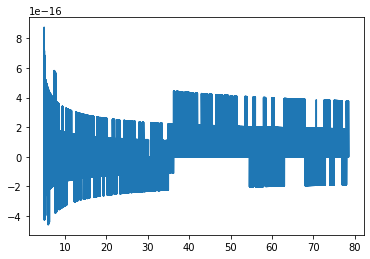

In [9]:
# plt.plot(m1[finite_mgcp],my[finite_mgcp])
# plt.plot(m1[finite_mgcp],mgcp[finite_mgcp])
plt.plot(m1[finite_mgcp],diff_perc_finite)

# plt.ylim(-20,0)

# PL Peak

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../../../DarkSirensStatV1")
sys.path.append("../../DarkSirensStatV1")
import DarkSirensStatV1 as DS
import MGCosmoPop
from MGCosmoPop.population.astro import astroMassDistribution
import numpy as np
mf = astroMassDistribution.PowerLawPlusPeakMass()

from test_mass import mass
import numpy as np
import importlib
importlib.reload(mass)
m2 = np.linspace(1,100,10**7)
m1 = np.linspace(2,101,10**7)

lambdaBBHmass = mass.get_base_PLP()

ml, mh = lambdaBBHmass["ml"],lambdaBBHmass["mh"]
alpha, beta = lambdaBBHmass["alpha"], lambdaBBHmass["beta"]
dm = lambdaBBHmass["deltam"]
lambdaPeak = lambdaBBHmass["beta"]
mu, sigma = lambdaBBHmass["muMass"], lambdaBBHmass["sigmaMass"]

 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}


## _logpdfm1_PLP

In [5]:
%%timeit
mgcp = mf._logpdfm1(m1, lambdaPeak, alpha, dm, ml, mh, mu, sigma)

486 ms ± 58.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
my = mass._logpdfm1_PLP(m1, ml, mh, alpha, dm, lambdaPeak, mu, sigma)

431 ms ± 41.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
mgcp = mf._logpdfm1(m1, lambdaPeak, alpha, dm, ml, mh, mu, sigma)
finite_mgcp = np.isfinite(mgcp)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass._logpdfm1_PLP(m1, ml, mh, alpha, dm, lambdaPeak, mu, sigma)
finite_my   = np.isfinite(my)

print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

diff_perc_finite = (my[finite_mgcp]-mgcp[finite_mgcp])/mgcp[finite_mgcp]
print("\nEqual? ", np.isclose(mgcp,my, rtol=1e-3).all())
print("Equal finite? ", np.isclose(finite_mgcp,finite_my).all())
# print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [-6.66667848e+05 -2.80702974e+05 -1.77779008e+05 ... -1.36090214e+01
 -1.36090217e+01 -1.36090221e+01]
N Finite 9696969

Finite [-6.66667848e+05 -2.80702974e+05 -1.77779008e+05 ... -1.36090214e+01
 -1.36090217e+01 -1.36090221e+01]
N Finite 9696969

Equal?  True
Equal finite?  True


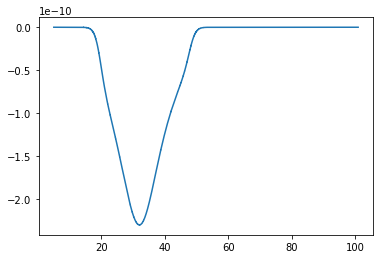

In [7]:
# plt.plot(m1[finite_mgcp],my[finite_mgcp])
# plt.plot(m1[finite_mgcp],mgcp[finite_mgcp])
plt.plot(m1[finite_mgcp],diff_perc_finite)

# plt.ylim(-20,0)

## _logpdfm2_PLP

In [8]:
%%timeit
mgcp = mf._logpdfm2(m2, beta, dm, ml)

216 ms ± 35.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
my = mass._logpdfm2_PLP(m2, ml, beta, dm)

104 ms ± 9.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
mgcp = mf._logpdfm2(m2, beta, dm, ml)
finite_mgcp = np.isfinite(mgcp)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass._logpdfm2_PLP(m2, ml, beta, dm)
finite_my   = np.isfinite(my)

print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

diff_perc_finite = (my[finite_mgcp]-mgcp[finite_mgcp])/mgcp[finite_mgcp]
print("\nEqual? ", np.isclose(mgcp,my, rtol=1e-3).all())
print("Equal finite? ", np.isclose(finite_mgcp,finite_my).all())
# print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [-7.61902382e+05 -2.96293963e+05 -1.83905724e+05 ...  3.73018769e+00
  3.73018777e+00  3.73018785e+00]
N Finite 9595959

Finite [-7.61902382e+05 -2.96293963e+05 -1.83905724e+05 ...  3.73018769e+00
  3.73018777e+00  3.73018785e+00]
N Finite 9595959

Equal?  True
Equal finite?  True


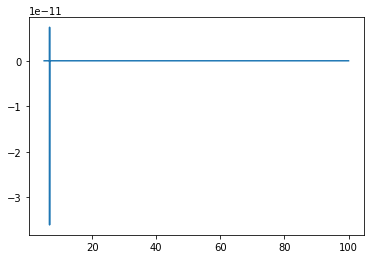

In [12]:
# plt.plot(m1[finite_mgcp],my[finite_mgcp])
# plt.plot(m1[finite_mgcp],mgcp[finite_mgcp])
plt.plot(m2[finite_mgcp],diff_perc_finite)

# plt.ylim(-20,0)

## _logC_PLP

In [14]:
%%timeit
mgcp = mf._logC(m1, beta, dm, ml)

218 ms ± 45.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
my = mass._logC_PLP(m1, ml, beta, dm)

133 ms ± 5.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
mgcp = mf._logC(m1, beta, dm, ml)
finite_mgcp = np.isfinite(mgcp)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass._logC_PLP(m1, ml, beta, dm)
finite_my   = np.isfinite(my)

print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

diff_perc_finite = (my[finite_mgcp]-mgcp[finite_mgcp])/mgcp[finite_mgcp]
print("\nEqual? ", np.isclose(mgcp,my, rtol=1e-3).all())
print("Equal finite? ", np.isclose(finite_mgcp,finite_my).all())
# print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [182.91812682 182.91812682 182.91812682 ...  -7.75110615  -7.75110633
  -7.75110651]
N Finite 10000000

Finite [182.91812682 182.91812682 182.91812682 ...  -7.75110615  -7.75110633
  -7.75110651]
N Finite 10000000

Equal?  True
Equal finite?  True


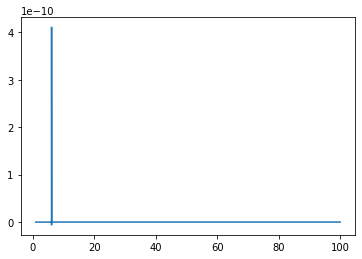

In [17]:
# plt.plot(m1[finite_mgcp],my[finite_mgcp])
# plt.plot(m1[finite_mgcp],mgcp[finite_mgcp])
plt.plot(m2[finite_mgcp],diff_perc_finite)

# plt.ylim(-20,0)

## _logN_PLP

In [2]:
%%timeit
mgcp = mf._logNorm(lambdaPeak, alpha, dm, ml, mh, mu, sigma)

284 µs ± 88.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
%%timeit
my = mass._logN_PLP(ml, mh, alpha, dm, lambdaPeak, mu, sigma)

148 µs ± 4.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
mgcp = mf._logNorm(lambdaPeak, alpha, dm, ml, mh, mu, sigma)
finite_mgcp = np.isfinite(mgcp)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass._logN_PLP(ml, mh, alpha, dm, lambdaPeak, mu, sigma)
finite_my   = np.isfinite(my)

print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

diff_perc_finite = (my[finite_mgcp]-mgcp[finite_mgcp])/mgcp[finite_mgcp]
print("\nEqual? ", np.isclose(mgcp,my, rtol=1e-3).all())
print("Equal finite? ", np.isclose(finite_mgcp,finite_my).all())
# print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [-0.13021244]
N Finite 1

Finite [-0.13021244]
N Finite 1

Equal?  True
Equal finite?  True


## logpdf

In [9]:
%%timeit
mgcp = mf.logpdf([m1,m2], [lambdaPeak, alpha, beta, dm, ml, mh, mu, sigma])

922 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
my = mass.logpdf_PLP(m1, m2, ml, mh, alpha, beta, dm, lambdaPeak, mu, sigma)

701 ms ± 29.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
mgcp = mf.logpdf([m1,m2], [lambdaPeak, alpha, beta, dm, ml, mh, mu, sigma])
finite_mgcp = np.isfinite(mgcp)
print("Finite", mgcp[np.isfinite(mgcp)])
print("N Finite", np.isfinite(mgcp).sum())


my = mass.logpdf_PLP(m1, m2, ml, mh, alpha, beta, dm, lambdaPeak, mu, sigma)
finite_my   = np.isfinite(my)

print("\nFinite", my[np.isfinite(my)])
print("N Finite", np.isfinite(my).sum())

diff_perc_finite = (my[finite_mgcp]-mgcp[finite_mgcp])/mgcp[finite_mgcp]
print("\nEqual? ", np.isclose(mgcp,my, rtol=1e-3).all())
print("Equal finite? ", np.isclose(finite_mgcp,finite_my).all())
# print("DIFF PERC: ", (my-mgcp)/mgcp)

Finite [-7.61904722e+05 -2.96296303e+05 -1.83908064e+05 ... -1.74997274e+01
 -1.74997278e+01 -1.74997283e+01]
N Finite 9595959

Finite [-7.61904722e+05 -2.96296303e+05 -1.83908064e+05 ... -1.74997274e+01
 -1.74997278e+01 -1.74997283e+01]
N Finite 9595959

Equal?  True
Equal finite?  True


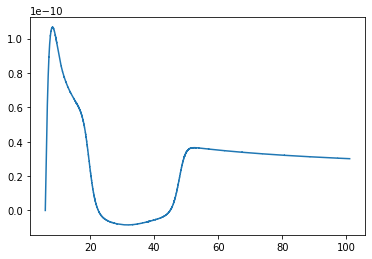

In [8]:
# plt.plot(m1[finite_mgcp],my[finite_mgcp])
# plt.plot(m1[finite_mgcp],mgcp[finite_mgcp])
plt.plot(m1[finite_mgcp],diff_perc_finite)

# plt.ylim(-20,0)